## In this toturial I applied some ML algorithms to data. 
The codes resources were provided at the end of this toturial. 
I think everyone can easily find the tools online and just arrange for them to achieve their desired goal. 
In this work, You will learn how to handle:

1. Missed values
2. Adding a new column to data
3. Delete some useless columns
4. Visualization
5. Parameters Featuring and Transforming (Dealing with those parameters that are an object not digit)
6. Splitting data (train, validate and test)
7. Fitting ML models (Random Forest, Logistic Regression, Decision Tree, Gaussian, Linear SVC)
8. Accuracy, Precision, Sensitivity or Recall, F1 score concepts
9. Evaluating Model Performances
10. Saving your model
11. Uploading your model and how to apply it to other data
You may use docker for this Notebook. 
(docker pull atashnezhad/datasciencenotebook)

In [1]:
pwd

'C:\\Users\\DASLAB Hareland 3\\data science notebook project\\codes'

In [2]:
# Import numpy and pandas two essential libraries.
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

Load the csv data file and visualize paramters.

In [3]:
#data = pd.read_csv("C:/Users/DASLAB Hareland 3/Desktop/atashnezhad-ai-interview-code-amin-2a2ca6bbf490/data.csv")
#data.head()
#data = pd.read_csv("C:/Users/Farshid/Documents/ai-interview-code-amin/data.csv")
#data.head()
data = pd.read_csv("data.csv")
data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
data.tail()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
378660,999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [5]:
data.shape

(378661, 15)

In [6]:
# Import Pandas
import pandas as pd
#Import Numpy for numerical computation
import numpy as np
# Import matplotlib & seaborn for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [7]:
# !pip install missingno

In [8]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

Index(['ID', 'goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real',
       'usd_goal_real'],
      dtype='object')

In [9]:
categorical_features = data.select_dtypes(include=[np.object])
categorical_features.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline', 'launched',
       'state', 'country'],
      dtype='object')

In [10]:
#Estimate Skewness and Kurtosis
#data.skew(), data.kurt()

In [11]:
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [12]:
print(data.keys())

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


# Dealing with NaN Values (Imputation)

See if there are null/ missing/NaN in data. 

In [13]:
def null_table(data):
    print("Training Data Frame")
    print(pd.isnull(data).sum()) 
    print(" ")
    
null_table(data)

Training Data Frame
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
 


The name of project and the ID do not affect a project final results. 
Drop name and project ID. In addition, the currency should be taken out of data becasue the pledges were provided in USD.

In [14]:
data.drop(labels = ["ID","name"], axis = 1, inplace = True)
null_table(data)

Training Data Frame
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
 


# Data2

Feed data to new dataframe (data2) and drop those rows that missed. droping the whole column is not accepted. 

In [15]:
import copy
data2=copy.deepcopy(data)
data2 = data2[np.isfinite(data2['usd pledged'])]
null_table(data2)
data2.describe()

Training Data Frame
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64
 


,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748640e+05,3.748640e+05,374864.000000,3.748640e+05,3.748640e+05,3.748640e+05
mean,4.952310e+04,9.750436e+03,106.687276,7.036729e+03,9.120803e+03,4.586318e+04
std,1.189355e+06,9.601043e+04,911.705321,7.863975e+04,9.131921e+04,1.158761e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.500000e+03,6.200000e+02,12.000000,3.947200e+02,6.244100e+02,5.500000e+03
75%,1.650000e+04,4.080000e+03,57.000000,3.034090e+03,4.050815e+03,1.600000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


The deadline time and time that a project is lunched are not important itself. subtract these two to find out how much time was avalabe for each project. Use the csv file and subtracted these two columns to achive the number of days. The diff.csv file was uploaded and columns including 'launched' and 'dedline' and'currency' were deleted. The data2 is turne to data3 now with a new diff column (without launched, currency and deadline columns).

In [16]:
data2.drop(labels = ["deadline","launched","currency"], axis = 1, inplace = True)
data2.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95
1,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00
2,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00
3,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00
4,Film & Video,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Upload the diff.csv file which provides the number of days for each projest.

In [17]:
#NumOfDays = pd.read_csv("C:/Users/DASLAB Hareland 3/Desktop/atashnezhad-ai-interview-code-amin-2a2ca6bbf490/diff.csv")
#NumOfDays.head()
#NumOfDays = pd.read_csv("C:/Users/Farshid/Documents/ai-interview-code-amin/diff.csv")
NumOfDays = pd.read_csv("diff.csv")
NumOfDays.head()

,diff
0,58.491343
1,59.802813
2,44.985532
3,29.858206
4,55.642326


# Data3

In [18]:
import copy
data3=copy.deepcopy(data2)
data3['NumOfDays']=NumOfDays
data3.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58.491343
1,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59.802813
2,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,44.985532
3,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29.858206
4,Film & Video,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55.642326


# Plotting and Visualizing Data

In [19]:
#data3.describe()
data3.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,Poetry,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,58.491343
1,Narrative Film,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,59.802813
2,Narrative Film,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,44.985532
3,Music,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,29.858206
4,Film & Video,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55.642326


Data has lot of skews. The random foreset, descion tree are used to model these data. before that some works should be done on data.
Final cumulative graph of a pair plot that shows the relations between all of the different features.

# Feature Engineering

Take the objects out of data and save it as data_obj

Replace the data 3 objects into the data_obj and work with data_obj to make sure original data is kept.

In [20]:
data_obj = data3.select_dtypes(include=['object']).copy()
data_obj.head()

,category,main_category,state,country
0,Poetry,Publishing,failed,GB
1,Narrative Film,Film & Video,failed,US
2,Narrative Film,Film & Video,failed,US
3,Music,Music,failed,US
4,Film & Video,Film & Video,canceled,US


In [21]:
# Just Doule check null values. Number of null values in data_obj. which were filtered already.
print(data_obj.isnull().values.sum())
# Doule check null values. Number of null values in data_obj by taking the columns into account. 
print(data_obj.isnull().sum())

0
category         0
main_category    0
state            0
country          0
dtype: int64


check out the frequency distribution of categories within the feature

In [22]:
print(data_obj['category'].value_counts().count())
print(data_obj['main_category'].value_counts().count())
print(data_obj['state'].value_counts().count())
print(data_obj['country'].value_counts().count())

159
15
5
22


In [23]:
# from matplotlib import rcParams
# figure size in inches
# rcParams['figure.figsize'] = 15.7,8.27
# visualizing main_category
# main_category_count = data_obj['main_category'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(main_category_count.index, main_category_count.values, alpha=0.9)
# plt.title('Frequency Distribution of main_category')
# plt.ylabel('Number of Occurrences', fontsize=12)
# plt.xlabel('main_category', fontsize=12)
# plt.show()

Begin Data Featuring. Replace Values with digits. The models work with digits.

In [24]:
labels = data_obj['category'].astype('category').cat.categories.tolist()
replace_map_comp1 = {'category' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp1)
data_obj.replace(replace_map_comp1, inplace=True)
print(data_obj.head())

labels = data_obj['main_category'].astype('category').cat.categories.tolist()
replace_map_comp2 = {'main_category' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp2)
data_obj.replace(replace_map_comp2, inplace=True)
print(data_obj.head())

labels = data_obj['state'].astype('category').cat.categories.tolist()
replace_map_comp3 = {'state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp3)
data_obj.replace(replace_map_comp3, inplace=True)
print(data_obj.head())

labels = data_obj['country'].astype('category').cat.categories.tolist()
replace_map_comp4 = {'country' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
print(replace_map_comp4)
data_obj.replace(replace_map_comp4, inplace=True)
print(data_obj.head())

{'category': {'3D Printing': 1, 'Academic': 2, 'Accessories': 3, 'Action': 4, 'Animals': 5, 'Animation': 6, 'Anthologies': 7, 'Apparel': 8, 'Apps': 9, 'Architecture': 10, 'Art': 11, 'Art Books': 12, 'Audio': 13, 'Bacon': 14, 'Blues': 15, 'Calendars': 16, 'Camera Equipment': 17, 'Candles': 18, 'Ceramics': 19, "Children's Books": 20, 'Childrenswear': 21, 'Chiptune': 22, 'Civic Design': 23, 'Classical Music': 24, 'Comedy': 25, 'Comic Books': 26, 'Comics': 27, 'Community Gardens': 28, 'Conceptual Art': 29, 'Cookbooks': 30, 'Country & Folk': 31, 'Couture': 32, 'Crafts': 33, 'Crochet': 34, 'DIY': 35, 'DIY Electronics': 36, 'Dance': 37, 'Design': 38, 'Digital Art': 39, 'Documentary': 40, 'Drama': 41, 'Drinks': 42, 'Electronic Music': 43, 'Embroidery': 44, 'Events': 45, 'Experimental': 46, 'Fabrication Tools': 47, 'Faith': 48, 'Family': 49, 'Fantasy': 50, "Farmer's Markets": 51, 'Farms': 52, 'Fashion': 53, 'Festivals': 54, 'Fiction': 55, 'Film & Video': 56, 'Fine Art': 57, 'Flight': 58, 'Food'

Fix the data3 values by repalcing data_obj into the data3.

In [25]:
data3['category']=copy.deepcopy(data_obj['category'])
data3['main_category']=copy.deepcopy(data_obj['main_category'])
data3['state']=copy.deepcopy(data_obj['state'])
data3['country']=copy.deepcopy(data_obj['country'])
data3.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1000.0,0.0,2,0,10,0.0,0.0,1533.95,58.491343
1,94,7,30000.0,2421.0,2,15,22,100.0,2421.0,30000.00,59.802813
2,94,7,45000.0,220.0,2,3,22,220.0,220.0,45000.00,44.985532
3,91,11,5000.0,1.0,2,1,22,1.0,1.0,5000.00,29.858206
4,56,7,19500.0,1283.0,1,14,22,1283.0,1283.0,19500.00,55.642326


# Transformation 
Find those paramters that have bias and try to reduce the bias using some trasformations like power.

In [26]:
data3.describe()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
count,374864.000000,374864.000000,3.748640e+05,3.748640e+05,374864.000000,374864.000000,374864.000000,3.748640e+05,3.748640e+05,3.748640e+05,374864.000000
mean,81.720512,8.494758,4.952310e+04,9.750436e+03,2.632963,106.687276,19.079450,7.036729e+03,9.120803e+03,4.586318e+04,33.931960
std,45.293968,3.915174,1.189355e+06,9.601043e+04,1.087543,911.705321,5.910642,7.863975e+04,9.131921e+04,1.158761e+06,66.235943
min,1.000000,1.000000,1.000000e-02,0.000000e+00,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.005058
25%,40.000000,6.000000,2.000000e+03,3.100000e+01,2.000000,2.000000,22.000000,1.698000e+01,3.100000e+01,2.000000e+03,29.098044
50%,88.000000,8.000000,5.500000e+03,6.200000e+02,2.000000,12.000000,22.000000,3.947200e+02,6.244100e+02,5.500000e+03,29.690828
75%,122.000000,11.000000,1.650000e+04,4.080000e+03,4.000000,57.000000,22.000000,3.034090e+03,4.050815e+03,1.600000e+04,36.742758
max,159.000000,15.000000,1.000000e+08,2.033899e+07,5.000000,219382.000000,22.000000,2.033899e+07,2.033899e+07,1.663614e+08,16738.958330


In this toturial we dont use the log transformation but you may try it and evalute the results. Just make sure that the min value of the columns should not be zero. You may add some constant (small non zero value) and evalute the prediction accuray. If you comapre the distribution plots, you can see that the log transformation will generate more distribution than the other type which is promising! You also may check how different between power and log transformation at the following:

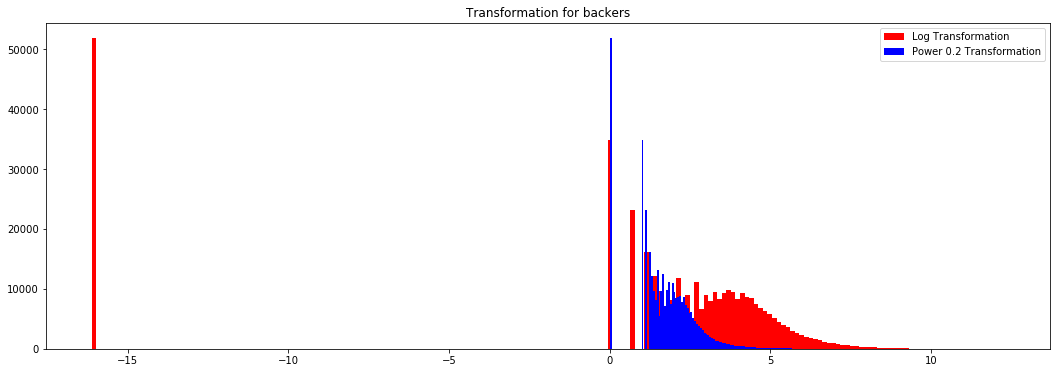

In [27]:
%matplotlib inline
import math
from matplotlib.pyplot import figure
TTT=copy.deepcopy(data3)
TTT=TTT.astype(float)
TTT.head()
from matplotlib import pyplot
plt.figure(figsize=(18,6))
pyplot.hist(np.log((TTT['backers']+0.0000001)), bins=200, color='red', label='Log Transformation')
pyplot.hist((TTT['backers']**(1/5)), bins=200, color='blue', label='Power {} Transformation'.format(1/5))

pyplot.title("Transformation for backers")
pyplot.legend(loc='upper right')
pyplot.show()

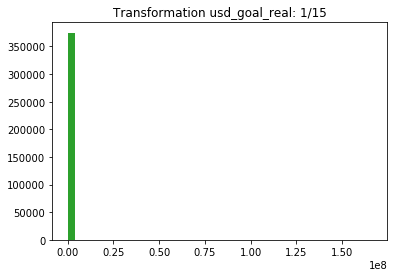

In [28]:
%matplotlib inline
from matplotlib import pyplot
bins = 40
for i in [1,10]:
#     print(i)
    pyplot.hist(data3['NumOfDays']**(1/i), bins=bins)
    pyplot.title("Transformation NumOfDays: 1/{}".format(str(i)))
#     pyplot.show() 
    
for i in [1,15]:
    pyplot.hist(data3['usd_pledged_real']**(1/i), bins=bins)
    pyplot.title("Transformation usd_pledged_real: 1/{}".format(str(i)))
#     pyplot.show() 

for i in [1,15]:
    pyplot.hist(data3['usd pledged']**(1/i), bins=bins)
    pyplot.title("Transformation pledged: 1/{}".format(str(i)))
#     pyplot.show()  
    
for i in [1,20]:
    pyplot.hist(data3['goal']**(1/i), bins=bins)
    pyplot.title("Transformation goal: 1/{}".format(str(i)))
#     pyplot.show()  

for i in [1,15]:
    pyplot.hist(data3['pledged']**(1/i), bins=bins)
    pyplot.title("Transformation pledged: 1/{}".format(str(i)))
#     pyplot.show()
    
for i in [1,10]:
    pyplot.hist(data3['backers']**(1/i), bins=bins)
    pyplot.title("Transformation backers: 1/{}".format(str(i)))
#     pyplot.show()
    
for i in [1,15]:
    pyplot.hist(data3['usd_goal_real']**(1/i), bins=bins)
    pyplot.title("Transformation usd_goal_real: 1/{}".format(str(i)))
#     pyplot.show() 

Check out  the paramters distributions before transforming.

c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


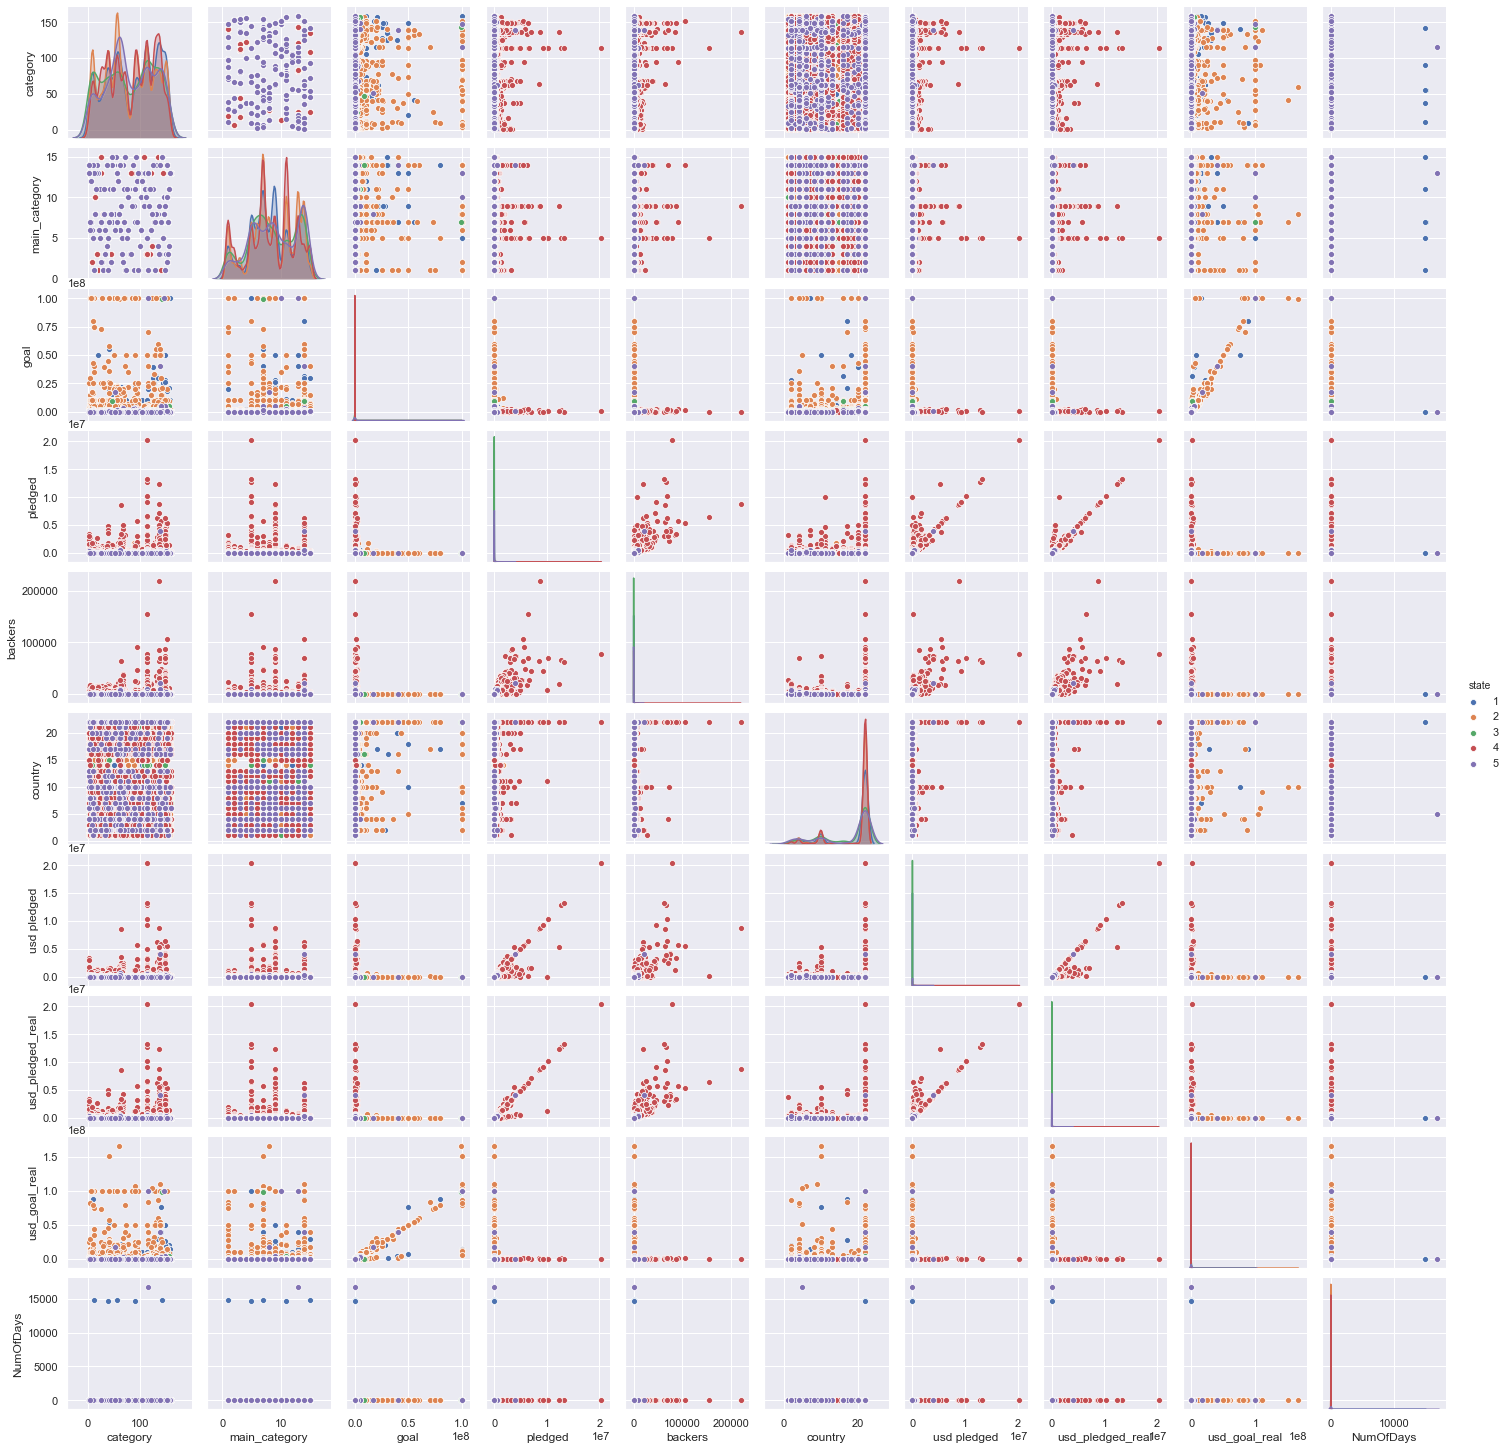

In [29]:
import seaborn as sns
sns.set()
columns = ['category','main_category','goal','pledged','state','backers','country','usd pledged','usd_pledged_real','usd_goal_real','NumOfDays']
sns.pairplot(data3[columns],size = 2 ,kind ='scatter',diag_kind='kde',hue="state")
plt.show()

Transforming parameters including: goal, backers, pledged, usd pledged, usd_pledged_real and NumberOfDats.

In [30]:
dataTrans=copy.deepcopy(data3)
data3.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1000.0,0.0,2,0,10,0.0,0.0,1533.95,58.491343
1,94,7,30000.0,2421.0,2,15,22,100.0,2421.0,30000.00,59.802813
2,94,7,45000.0,220.0,2,3,22,220.0,220.0,45000.00,44.985532
3,91,11,5000.0,1.0,2,1,22,1.0,1.0,5000.00,29.858206
4,56,7,19500.0,1283.0,1,14,22,1283.0,1283.0,19500.00,55.642326


In [31]:
dataTrans['goal']=dataTrans['goal']**(1/20)
dataTrans['backers']=dataTrans['backers']**(1/10)
dataTrans['pledged']=dataTrans['pledged']**(1/15)
dataTrans['usd pledged']=dataTrans['usd pledged']**(1/15)
dataTrans['usd_pledged_real']=dataTrans['usd_pledged_real']**(1/15)
dataTrans['NumOfDays']=dataTrans['NumOfDays']**(1/10)
dataTrans['usd_goal_real']=dataTrans['usd_goal_real']**(1/15)
dataTrans.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,2,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,2,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,94,7,1.708680,1.432721,2,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,91,11,1.530906,1.000000,2,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,56,7,1.638709,1.611444,1,1.302005,22,1.611444,1.611444,1.931979,1.494654


# Filtering column "state" with zero and 1 values
The object of the moel is to determine Whether  a project is succsful or not. Therefore the "4" in the column "state" is replace with 1 and the rest of values are assigned to zero. 

In [32]:
print(replace_map_comp3)

{'state': {'canceled': 1, 'failed': 2, 'live': 3, 'successful': 4, 'suspended': 5}}


In [33]:
dataTrans['state'] = np.where(dataTrans['state'] == 4, 1, 0)
dataTrans.head()

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,0,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,0,1.311019,22,1.359356,1.681124,1.988267,1.505470
2,94,7,1.708680,1.432721,0,1.116123,22,1.432721,1.432721,2.042745,1.463212
3,91,11,1.530906,1.000000,0,1.000000,22,1.000000,1.000000,1.764404,1.404450
4,56,7,1.638709,1.611444,0,1.302005,22,1.611444,1.611444,1.931979,1.494654


c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


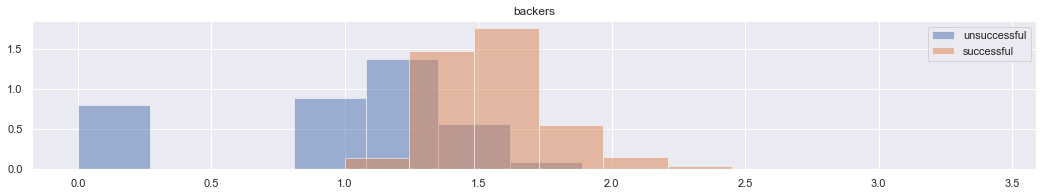

c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]
c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


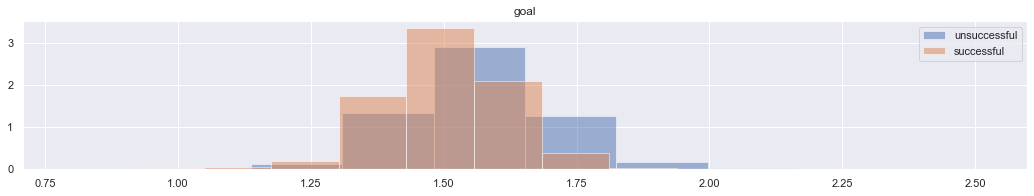

In [34]:
#some visualizations

plt.figure(figsize=(18,6))
plt.subplot(2, 1, 1)
pyplot.hist(dataTrans[dataTrans['state']==0]['backers'], alpha=0.5, normed=True, label='unsuccessful')
pyplot.hist(dataTrans[dataTrans['state']==1]['backers'], alpha=0.5, normed=True, label='successful')
pyplot.legend(loc='upper right')
pyplot.title("backers")
pyplot.show()

plt.figure(figsize=(18,6))
plt.subplot(2, 1, 2)
pyplot.hist(dataTrans[dataTrans['state']==0]['goal'], alpha=0.5, normed=True, label='unsuccessful')
pyplot.hist(dataTrans[dataTrans['state']==1]['goal'], alpha=0.5, normed=True, label='successful')
pyplot.legend(loc='upper right')
pyplot.title("goal")
pyplot.show()


In [35]:
# Some visualizations
#plt.figure(figsize = (12, 6))
#sns.countplot(x = 'main_category', data = dataTrans)
#xt = plt.xticks(rotation=45)
import seaborn as sns
sns.set()
columns = ['category','main_category','goal','pledged','state','backers','country','usd pledged','usd_pledged_real','usd_goal_real','NumOfDays']
#sns.pairplot(dataTrans[columns],size = 2 ,kind ='scatter',diag_kind='kde',hue="state")
plt.show()

It is seen that paramters like usd_pledged_real, usd_pledged, backers, pledged are good for estimation projects state.

usd_pledged_real
backers
usd_goal_real
 usd pledged
  pledged
  goal

# Split data to train and test

In [36]:
dataTrans.head(2)

,category,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,0,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,0,1.311019,22,1.359356,1.681124,1.988267,1.505470


# data4 

In [37]:
data4=copy.deepcopy(dataTrans)
data4.head(2)
#data4['NumOfDays']=NumOfDays
#data4.head()
state=copy.deepcopy(data4['state'])
state.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    0
9    0
Name: state, dtype: int32

In [38]:
data4.drop(labels = ["state"], axis = 1, inplace = True)
data4.head(2)

,category,main_category,goal,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,NumOfDays
0,109,13,1.412538,0.000000,0.000000,10,0.000000,0.000000,1.630750,1.502136
1,94,7,1.674388,1.681124,1.311019,22,1.359356,1.681124,1.988267,1.505470


In [39]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [40]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data4, state, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(299891, 10) (299891,)
(74973, 10) (74973,)


# Model Fitting and Predicting
Importing different classifiers from sklearn. 
Lets try different types of models (ML) to see which one gives the best accuracy for its predictions.


In [41]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Validation Data Set

In [42]:
from sklearn.model_selection import train_test_split #to create validation data set
X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

Evaluate the model performanceusing make_scorere and accuracy_score function from sklearn metrics.

In [43]:
from sklearn.metrics import make_scorer, accuracy_score 

# KNeighbors Model

In [44]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)
print(acc_knn)

0.9631704429883793


You should always apply some evaluations on the model depend on what you looking for. Depend on your project you may try to reduce FP or FN. Then you may try to tune your ML to achieve your goal (tuning effective paramters). To zoom on Fraudulent transaction recognization, optimize the sensitivity. To get email spam optimze your model to achive the high precision or specificity. and so on...

In [45]:
from sklearn import metrics

In [46]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_valid, pred_knn)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[37246  1301]
 [  908 20524]]


### Accuracy 

In [47]:
#how often is the classifier correct?
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_valid, pred_knn))

0.9631704429883793
0.9631704429883793


### Precision

In [48]:
# Precision: When a positive value is predicted, how often is the prediction correct? Precision = TP/TP+FP
precision = TP / float(TP + FP)
print(precision)
print((TP + TN) / float(TP + TN + FP + FN))

0.940389461626575
0.9631704429883793


### Sensitivity or Recall

In [49]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
sensitivity = TP / float(FN + TP)
print(sensitivity)
print((TP + TN) / float(TP + TN + FP + FN))

0.9576334453154162
0.9631704429883793


### F1 score

This score takes both false positives and false negatives into account.
Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall (see reff).


In [50]:
# F1 Score = 2*(sensitivity * Precision) / (sensitivity + Precision)
F1_Score = 2*(sensitivity * precision) / (sensitivity + precision)
print(F1_Score)
print((TP + TN) / float(TP + TN + FP + FN))

0.9489331206509928
0.9631704429883793


In [51]:
# Specificity: When the actual value is negative, how often is the prediction correct?
specificity = TN / (TN + FP)
print(specificity)
print((TP + TN) / float(TP + TN + FP + FN))

0.9662489947337017
0.9631704429883793


In [52]:
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
# and false negative rate
print(1 - specificity)

0.03375100526629828
0.03375100526629826


# RandomForest Model

In [53]:
rf_clf = RandomForestClassifier(n_estimators=50, n_jobs=-1) # increase the number of trees to get better results
rf_model=rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print(acc_rf)

0.9947314893546074


In [54]:
#print(dir(RandomForestClassifier))
#print(RandomForestClassifier())

In [55]:
# metrics confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_valid, pred_knn))

[[37246  1301]
 [  908 20524]]


Check out what feathers are important in the model.

In [56]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.24613804686840615, 'backers'),
 (0.2145673830036505, 'usd_pledged_real'),
 (0.17610496095860995, 'pledged'),
 (0.15194187408197166, 'usd_goal_real'),
 (0.11802906592913098, 'goal'),
 (0.07915595028316255, 'usd pledged'),
 (0.007330943289759801, 'NumOfDays'),
 (0.0026645444020097437, 'category'),
 (0.002357119112926185, 'main_category'),
 (0.0017101120703724763, 'country')]

# LogisiticRegression Model

In [57]:
print(dir(LogisticRegression())) #check out what feather is provided 

['C', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'class_weight', 'decision_function', 'densify', 'dual', 'fit', 'fit_intercept', 'get_params', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_proba', 'random_state', 'score', 'set_params', 'solver', 'sparsify', 'tol', 'verbose', 'warm_start']


In [58]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)
print(acc_logreg)

0.9828940129045166


c:\users\daslab hareland 3\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [59]:
# metrics confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_valid, pred_logreg))

[[37621   926]
 [  100 21332]]


# DecisionTree Model

In [60]:
print(dir(DecisionTreeClassifier())) #check out what feather is provided 

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_prune_tree', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_X_predict', '_validate_data', 'apply', 'ccp_alpha', 'class_weight', 'cost_complexity_pruning_path', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_depth', 'get_n_leaves', 'get_params', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_we

In [61]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)
print(acc_dt)

0.9901798962970373


In [62]:
# metrics confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_valid, pred_dt))

[[38262   285]
 [  304 21128]]


In [63]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('fivethirtyeight')

from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import re
from sklearn.model_selection import train_test_split
from subprocess import check_output

with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(dt_clf,
                              out_file=f,
                              max_depth = 3,
                              impurity = False,
                              feature_names = X_test.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )
        
#Convert .dot to .png to allow display in web notebook
check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
img.save('sample-out.png')
PImage("sample-out.png")

FileNotFoundError: [WinError 2] The system cannot find the file specified

# GaussianNB Model

In [ ]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)
print(acc_gnb)

In [ ]:
# metrics confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_valid, pred_gnb))

# Linear SVC Model

In [ ]:
linsvc_clf = LinearSVC()
linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)
print(acc_linsvc)

In [ ]:
# metrics confusion
from sklearn import metrics
print(metrics.confusion_matrix(y_valid, pred_linsvc))

# Evaluating Model Performances

In [ ]:
model_performance = pd.DataFrame({
    "Model": ["Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

It is seen that the Random Forest is the best model.

# Apply the Random Forest to test data to see how much it works

In [ ]:
pred_rf = rf_clf.predict(X_test)
acc_rf = accuracy_score(y_test, pred_rf)
print(acc_rf)

# Save Your Model 

In [ ]:
#import pickle
# save the model to current working directory
#filename = 'rf_amin_model.sav'
#pickle.dump(rf_clf, open(filename, 'wb'))

You may load the model and apply to new data sometimes later.

In [ ]:
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

The Model uses below columns and formats to predicc the state of each project. Before applying model following points shoulb be taken into account.

The columns that are fed into the model are:
'category', 'main_category', 'goal', 'pledged', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real' and 'NumOfDays'

Number of inputs = 10
Number of Outputs = 1 (state) 1==succesful, 0 == Not Succesful

The 'NumOfDays' column was generated by subtracting the deadline from launched date in csv file and it was saved and uploaded seperatly.
The columns 'category', 'main_category', 'state' and 'country' were objects that were replaced with values. 
The above codes can be applied to any data before usign the model for prediction. The replaced values are seen by runing below lines.

Don not forget to transfor your new data using the sme trasformer that we applied here before using the model for prediction.

In [ ]:
print(replace_map_comp1)
print(replace_map_comp2)
print(replace_map_comp3)
print(replace_map_comp4)

Once the new data was prepared, the model can be applied for prediction.

Done. Good Luck everyone! :)

Some Resources:

1) https://www.ritchieng.com/machine-learning-evaluate-classification-model/

2) https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis

3) https://www.kaggle.com/ialimustafa/titanic-beginner-s-guide-with-sklearn

4) http://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/